**Submitted By: Zainab Anwaar (339636)**


Importing Libraries and Modules

In [125]:
import pandas as pd 
import numpy as np 
from sklearn import model_selection
from sklearn.model_selection import GridSearchCV
from sklearn import tree 
import matplotlib.pyplot as plt 
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
%matplotlib inline 
import graphviz 

Loading Data from car.data file

In [126]:
df=pd.read_csv('car.data')
df.head()
df.columns = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'target']
df.head()


,buying,maint,doors,persons,lug_boot,safety,target
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


To see the properties of the data set


In [127]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1727 entries, 0 to 1726
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1727 non-null   object
 1   maint     1727 non-null   object
 2   doors     1727 non-null   object
 3   persons   1727 non-null   object
 4   lug_boot  1727 non-null   object
 5   safety    1727 non-null   object
 6   target    1727 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [128]:
df.isnull() # to check if there are any missing values

,buying,maint,doors,persons,lug_boot,safety,target
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
1722,False,False,False,False,False,False,False
1723,False,False,False,False,False,False,False
1724,False,False,False,False,False,False,False
1725,False,False,False,False,False,False,False


Encoding string to ordinal data

In [129]:
ordinal = OrdinalEncoder()
df = ordinal.fit_transform(df)
df = pd.DataFrame(df, columns=['buying', 'maint', 'doors', 'persons','lug_boot', 'safety','target'])
X = df[['buying', 'maint', 'doors', 'persons','lug_boot', 'safety']]
y = df[['target']]



Shape and type of transformed data

In [130]:
print('X shape=', X.shape)
print('y shape=', y.shape)
df.head()

X shape= (1727, 6)
y shape= (1727, 1)


,buying,maint,doors,persons,lug_boot,safety,target
0,3.0,3.0,0.0,0.0,2.0,2.0,2.0
1,3.0,3.0,0.0,0.0,2.0,0.0,2.0
2,3.0,3.0,0.0,0.0,1.0,1.0,2.0
3,3.0,3.0,0.0,0.0,1.0,2.0,2.0
4,3.0,3.0,0.0,0.0,1.0,0.0,2.0


Splitting Data into training, test and validation set

In [131]:
train_ratio = 0.6
validation_ratio = 0.2
test_ratio = 0.2

x_train, x_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=1 - train_ratio)
x_val, x_test, y_val, y_test = model_selection.train_test_split(x_test, y_test, test_size=test_ratio/(test_ratio + validation_ratio)) 

print(x_train, x_val, x_test)
print("x_train shape: {}".format(x_train.shape))
print("x_test shape: {}".format(x_test.shape))
print("x_val shape: {}".format(x_val.shape))
print("y_train shape: {}".format(y_train.shape))
print("y_test shape: {}".format(y_test.shape))
print("y val shape: {}".format(y_val.shape))

      buying  maint  doors  persons  lug_boot  safety
1482     1.0    0.0    2.0      2.0       0.0     2.0
1016     2.0    0.0    1.0      2.0       2.0     1.0
853      0.0    1.0    3.0      1.0       0.0     0.0
369      3.0    1.0    1.0      2.0       2.0     2.0
4        3.0    3.0    0.0      0.0       1.0     0.0
...      ...    ...    ...      ...       ...     ...
1555     1.0    2.0    1.0      1.0       0.0     0.0
1695     1.0    1.0    2.0      2.0       1.0     2.0
395      3.0    1.0    2.0      2.0       2.0     1.0
216      3.0    2.0    0.0      0.0       2.0     2.0
1355     1.0    3.0    2.0      0.0       0.0     1.0

[1036 rows x 6 columns]       buying  maint  doors  persons  lug_boot  safety
824      0.0    1.0    2.0      1.0       0.0     1.0
1066     2.0    0.0    3.0      1.0       1.0     0.0
594      0.0    0.0    2.0      0.0       2.0     2.0
958      2.0    3.0    3.0      1.0       1.0     0.0
1577     1.0    2.0    2.0      1.0       1.0     1.0
...

Decision Tree before any pruning

In [132]:
cls = tree.DecisionTreeClassifier(criterion="entropy",random_state=1)
cls.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=1)

Score of the testing data 


In [133]:
print("Test Score: ",cls.score(x_test,y_test))
print("Training Score: ",cls.score(x_train,y_train))


Test Score:  0.9624277456647399
Training Score:  1.0


Depth of the tree

In [134]:
cls.get_depth()

14

Number of Nodes in the tree

In [162]:
cls.tree_.node_count

147

Leaf Nodes in the tree

In [135]:

def find_leaf_nodes(classifier):
    leaf_nodes = []
    stack = [0] 
    while stack:
        node_id = stack.pop()
        if (classifier.tree_.children_left[node_id] == -1 and classifier.tree_.children_right[node_id] == -1):
            leaf_nodes.append(node_id)
        else:
            stack.append(classifier.tree_.children_left[node_id])
            stack.append(classifier.tree_.children_right[node_id])
    return len(leaf_nodes)
find_leaf_nodes(cls)

74

Plotting the tree

[Text(0.538527397260274, 0.9666666666666667, 'X[3] <= 0.5\nentropy = 1.202\nsamples = 1036\nvalue = [229, 40, 727, 40]'),
 Text(0.5248287671232876, 0.9, 'entropy = 0.0\nsamples = 347\nvalue = [0, 0, 347, 0]'),
 Text(0.5522260273972602, 0.9, 'X[5] <= 0.5\nentropy = 1.478\nsamples = 689\nvalue = [229, 40, 380, 40]'),
 Text(0.2966609589041096, 0.8333333333333334, 'X[1] <= 2.5\nentropy = 1.685\nsamples = 230\nvalue = [123, 18, 49, 40]'),
 Text(0.15496575342465754, 0.7666666666666667, 'X[0] <= 0.5\nentropy = 1.65\nsamples = 173\nvalue = [96, 18, 19, 40]'),
 Text(0.0410958904109589, 0.7, 'X[2] <= 0.5\nentropy = 0.239\nsamples = 51\nvalue = [49, 0, 2, 0]'),
 Text(0.0273972602739726, 0.6333333333333333, 'X[4] <= 1.5\nentropy = 0.684\nsamples = 11\nvalue = [9, 0, 2, 0]'),
 Text(0.0136986301369863, 0.5666666666666667, 'entropy = 0.0\nsamples = 6\nvalue = [6, 0, 0, 0]'),
 Text(0.0410958904109589, 0.5666666666666667, 'X[3] <= 1.5\nentropy = 0.971\nsamples = 5\nvalue = [3, 0, 2, 0]'),
 Text(0.02739

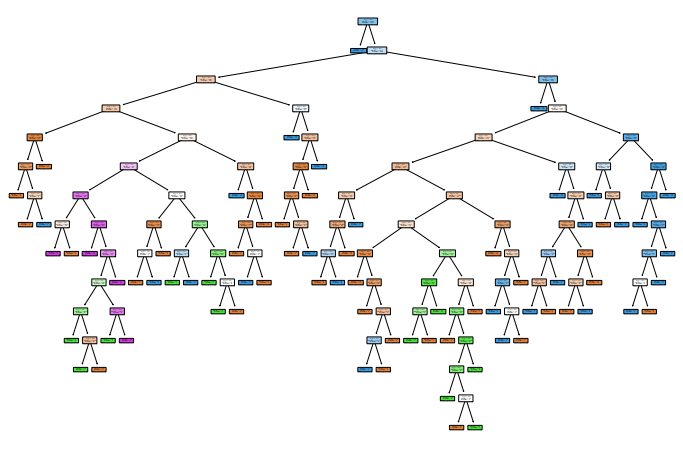

In [165]:
plt.figure(figsize=(12,8))
tree.plot_tree(cls,rounded=True,filled=True) 

In [137]:
dot_data = tree.export_graphviz(cls, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("decision tree") 

'decision tree.pdf'

**Pre Pruning the tree**

Getting the best parameters through GridSearchCV

In [138]:
params={"max_depth":[3,7,9,10,11,12,13,14],"min_samples_leaf":[1,2,3,4],"min_samples_split":[2,3,4,6,8]}
pre_pruned=tree.DecisionTreeClassifier(criterion="entropy",random_state=1)
grid_search=GridSearchCV(pre_pruned,params)
grid_search.fit(x_train,y_train)
print('Initial parameters: ', grid_search.best_params_)

Initial parameters:  {'max_depth': 11, 'min_samples_leaf': 1, 'min_samples_split': 2}


Fitting the trained data to pruned tree

In [139]:

pre_pruned_tree=tree.DecisionTreeClassifier(random_state=1,max_depth=11,min_samples_leaf=1, min_samples_split=2,criterion="entropy")
pre_pruned_tree.fit(x_train,y_train)


DecisionTreeClassifier(criterion='entropy', max_depth=11, random_state=1)

Depth, Leaf Nodes and Test Score

In [163]:
print("Depth: ",pre_pruned_tree.get_depth())
print("Number of Leaves: ",find_leaf_nodes(pre_pruned_tree))
print("Number of Nodes: ",pre_pruned_tree.tree_.node_count)

print("Test Score: ",pre_pruned_tree.score(x_test,y_test))
print("Training Score: ",pre_pruned_tree.score(x_train,y_train))

Depth:  11
Number of Leaves:  69
Number of Nodes:  137
Test Score:  0.9653179190751445
Training Score:  0.997104247104247


Plot of the pruned tree

[Text(0.538527397260274, 0.9583333333333334, 'X[3] <= 0.5\nentropy = 1.202\nsamples = 1036\nvalue = [229, 40, 727, 40]'),
 Text(0.5248287671232876, 0.875, 'entropy = 0.0\nsamples = 347\nvalue = [0, 0, 347, 0]'),
 Text(0.5522260273972602, 0.875, 'X[5] <= 0.5\nentropy = 1.478\nsamples = 689\nvalue = [229, 40, 380, 40]'),
 Text(0.2966609589041096, 0.7916666666666666, 'X[1] <= 2.5\nentropy = 1.685\nsamples = 230\nvalue = [123, 18, 49, 40]'),
 Text(0.15496575342465754, 0.7083333333333334, 'X[0] <= 0.5\nentropy = 1.65\nsamples = 173\nvalue = [96, 18, 19, 40]'),
 Text(0.0410958904109589, 0.625, 'X[2] <= 0.5\nentropy = 0.239\nsamples = 51\nvalue = [49, 0, 2, 0]'),
 Text(0.0273972602739726, 0.5416666666666666, 'X[4] <= 1.5\nentropy = 0.684\nsamples = 11\nvalue = [9, 0, 2, 0]'),
 Text(0.0136986301369863, 0.4583333333333333, 'entropy = 0.0\nsamples = 6\nvalue = [6, 0, 0, 0]'),
 Text(0.0410958904109589, 0.4583333333333333, 'X[3] <= 1.5\nentropy = 0.971\nsamples = 5\nvalue = [3, 0, 2, 0]'),
 Text(0

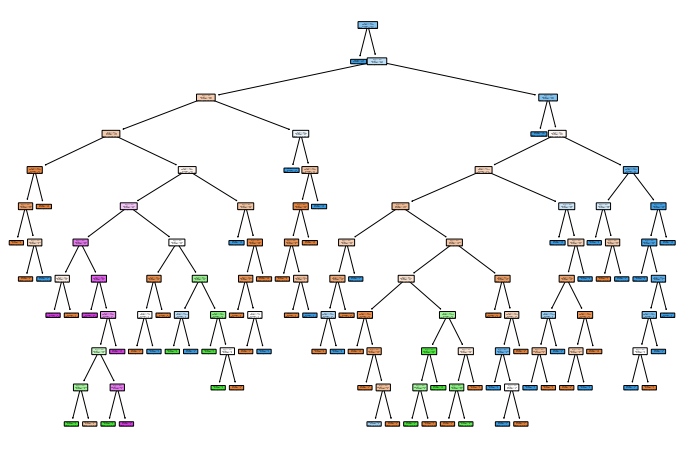

In [164]:
plt.figure(figsize=(12,8))
tree.plot_tree(pre_pruned_tree,rounded=True,filled=True) 

In [149]:
path=cls.cost_complexity_pruning_path(x_train,y_train)
ccp_alphas,impurities=path.ccp_alphas,path.impurities
clfs=[]   #will store all the models here
for ccp_alpha in ccp_alphas:
    clf=tree.DecisionTreeClassifier(random_state=0,ccp_alpha=ccp_alpha)
    clf.fit(x_train,y_train)
    clfs.append(clf)



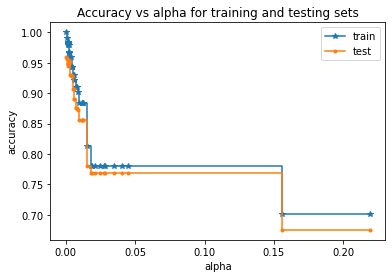

In [150]:
train_scores = [clf.score(x_train, y_train) for clf in clfs]
test_scores = [clf.score(x_val, y_val) for clf in clfs]
fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='*',label="train",drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='.', label="test",drawstyle="steps-post")
ax.legend()
plt.show()

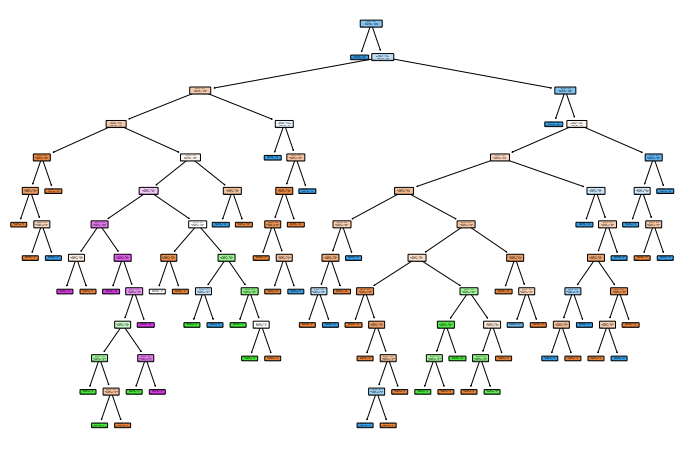

In [158]:
clf=tree.DecisionTreeClassifier(random_state=0,ccp_alpha=0.002, criterion="entropy")
clf.fit(x_train,y_train)
plt.figure(figsize=(12,8))
tree.plot_tree(clf,rounded=True,filled=True)
plt.show()



Depth, Total Nodes and Leaf Nodes

In [167]:
print("Depth: ",clf.get_depth())
print("Number of Leaves: ",find_leaf_nodes(clf))
print("Number of Nodes: ",clf.tree_.node_count)

Depth:  12
Number of Leaves:  60
Number of Nodes:  119


Score of post pruned tree


In [160]:
print("Test Data Accuracy: ",clf.score(x_val,y_val))
print("Train Data Accuracy: ",clf.score(x_train,y_train))

Test Data Accuracy:  0.9594202898550724
Train Data Accuracy:  0.9951737451737451
